<a href="https://colab.research.google.com/github/Joaosantos3/Curso-Python-Aplicado-Engenharia-de-Producao/blob/main/Parte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estat√≠stica Aplicada

### O que vamos aprender?

Nesta se√ß√£o de 4 horas, abordaremos algumas bibliotecas (*libraries*)
de an√°lise estat√≠stica e visualiza√ß√£o de dados, relembrar conceitos e coloc√°-los em pr√°tica.

- **Outliers**, como encontr√°-los e o que fazer com eles.
- **Distribui√ß√£o Normal/Gaussiana** um lembrete e novas aplica√ß√µes.
- **Testes de normalidade** e sua import√¢ncia em modelagem estat√≠stica.
- **Teste t** para amostras independentes.
- **Distribui√ß√µes Comuns**, respondendo perguntas com infer√™ncia Estat√≠stica.



### Por que isso √© importante?

Dominar conceitos estat√≠sticos √© fundamental para garantir an√°lises precisas e conclus√µes confi√°veis em diversas √°reas. Identificar e tratar outliers evita distor√ß√µes nos resultados. Compreender a distribui√ß√£o normal e aplicar testes de normalidade assegura que as suposi√ß√µes dos m√©todos estat√≠sticos s√£o atendidas, resultando em an√°lises v√°lidas. Aplicar corretamente testes t permite compara√ß√µes robustas entre m√©dias. Conhecer diferentes distribui√ß√µes estat√≠sticas facilita responder perguntas complexas com precis√£o. Em suma, essas habilidades aprimoram sua capacidade de transformar dados em insights valiosos, auxiliando na tomada de decis√µes informadas e na otimiza√ß√£o de processos.

### Outliers ou Valores at√≠picos
#### Um valor at√≠pico (outlier) √© um escore bastante diferente do resto dos dados. Quando analisamos dados devemos estar cientes de tais valores porque eles podem introduzir tendenciosidades no modelo que ajustamos aos dados. Outliers podem significar anomalias, registros err√¥neos ou dados corretos por√©m que fugiram da normalidade.

#### Geralmente existem duas formas de encontrar outliers:
- Olhar o BoxPlot
- Utilizar escores-z (z-scores)

###Usaremos os dados moldagem de fundi√ß√£o novamente:

- Montar o Drive
- Importar pandas
- Ler arquivo excel Dados_Moldagem_Fundicao.xlsx
- Realizar o C√°lculo da Cad√™ncia (Moldes/Tempo)
- Plotar novamente o BoxPlot para cada Dupla de Trabalho

```python
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df=pd.read_excel("/content/drive/MyDrive/Python para ProducÃßaÃÉo/Dados_Moldagem_Fundicao.xlsx")

df['Cadencia']=df['Moldes']/df['Tempo Opera√ß√£o']

df.boxplot(by='Grupo',column='Cadencia',figsize=(14,5))

```

Mounted at /content/drive


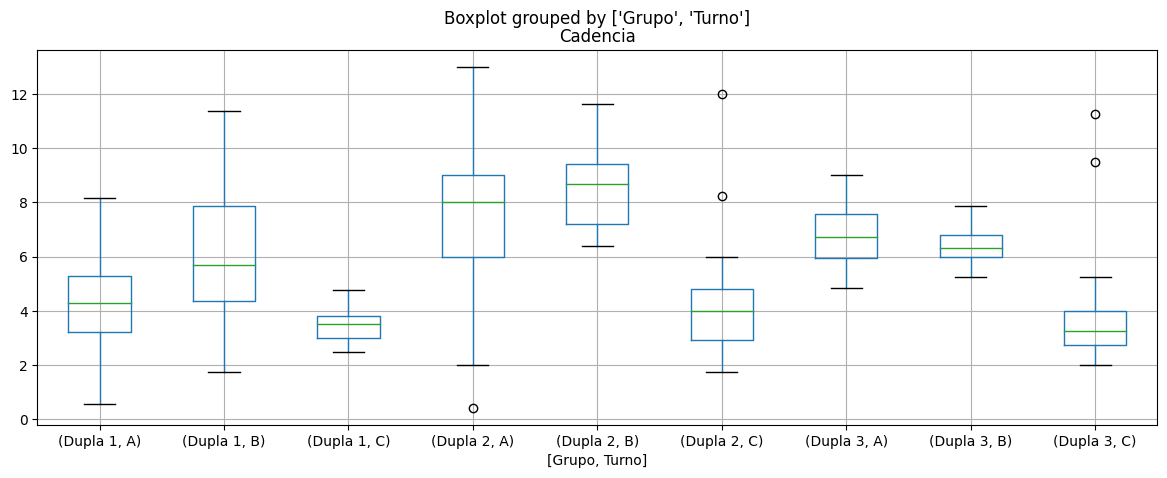

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df=pd.read_excel("/content/drive/MyDrive/Python para ProducÃßaÃÉo/Dados_Moldagem_Fundicao.xlsx")

df['Cadencia']=df['Moldes']/df['Tempo Opera√ß√£o']

ax=df.boxplot(by=['Grupo','Turno'],column='Cadencia',figsize=(14,5))

#### Agora, com histogramas tentaremos identificar os outliers, da mesma forma:

```python
df.hist(by='Grupo',column='Cadencia',figsize=(14,5))
```

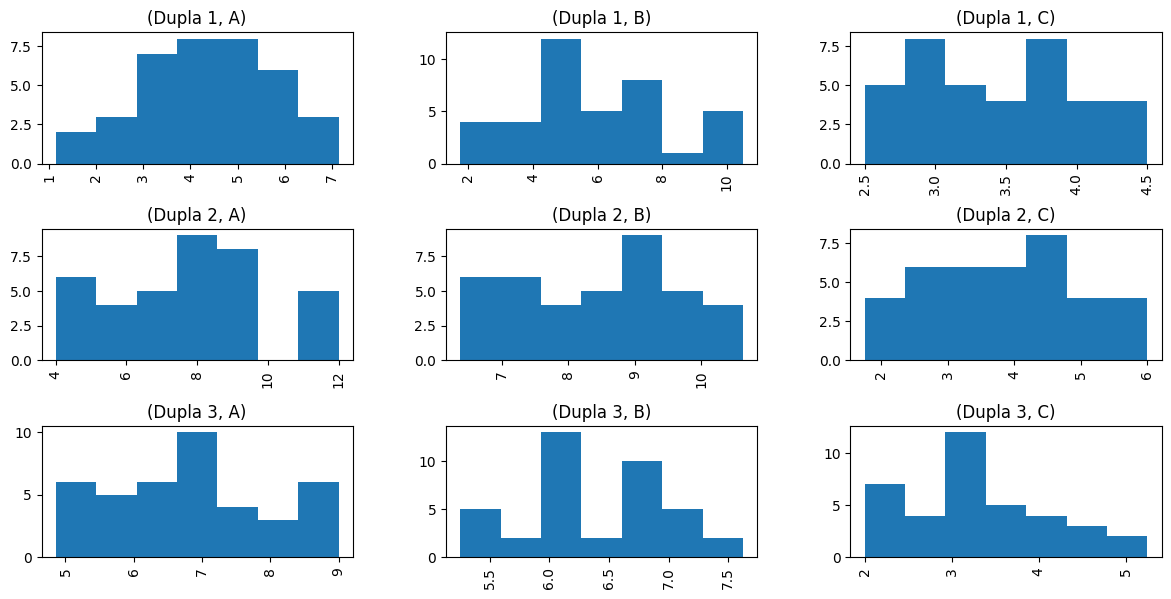

In [ ]:

ax=df.hist(by=['Grupo',"Turno"],column='Cadencia',figsize=(14,7),bins=7)

#### Como j√° temos no√ß√£o dos valores Whiskers (As fronteiras dos quartis), criaremos m√°scaras booleanas com as condicionais relativas a cada grupo **que identificamos outliers** com base na cad√™ncia m√°xima observada.

```python
mask1=(df['Grupo']=="Dupla 1") & (df['Cadencia']>8) & (df['Turno']=="A")
df[mask1]
```

In [ ]:
mask3=(df['Grupo']=="Dupla 2") & (df['Cadencia']>6) & (df['Turno']=="C")
df[mask3]

Turno  Moldes  Tempo Opera√ß√£o    Grupo  Falha Operacional  Cadencia
202     C      33               4  Dupla 2                  0      8.25
219     C      48               4  Dupla 2                  0     12.00

In [ ]:
mask4=(df['Grupo']=="Dupla 3") & (df['Cadencia']>6) & (df['Turno']=="C")
df[mask4]

Turno  Moldes  Tempo Opera√ß√£o    Grupo  Falha Operacional  Cadencia
350     C      45               4  Dupla 3                  0     11.25
354     C      38               4  Dupla 3                  0      9.50

#### Fechamos ent√£o uma forma de encontrar os outliers.

#### Desta forma, vamos utilizar agora conceitos estat√≠sticos de padroniza√ß√£o e normalidade.

#### Padroniza√ß√£o √© o processo de transformar os dados para que tenham uma m√©dia de 0 e um desvio padr√£o de 1.
#### Z-Score (ou escore-z) √© uma forma espec√≠fica de padroniza√ß√£o. Ele representa o n√∫mero de desvios padr√£o que um ponto de dados est√° distante da m√©dia da distribui√ß√£o dos dados.

#### F√≥rmula do Z-Score
Para calcular o Z-Score de um valor
ùë•, usamos a f√≥rmula:
$$ z=(x‚ÄìŒº)/œÉ$$
Onde:

- x √© o valor que queremos padronizar.
- ùúá √© a m√©dia dos dados.
- ùúé √© o desvio padr√£o dos dados.

Lembremos tamb√©m que seguindo uma distribui√ß√£o normal ou Gaussiana, temos a seguinte rela√ß√£o abaixo:

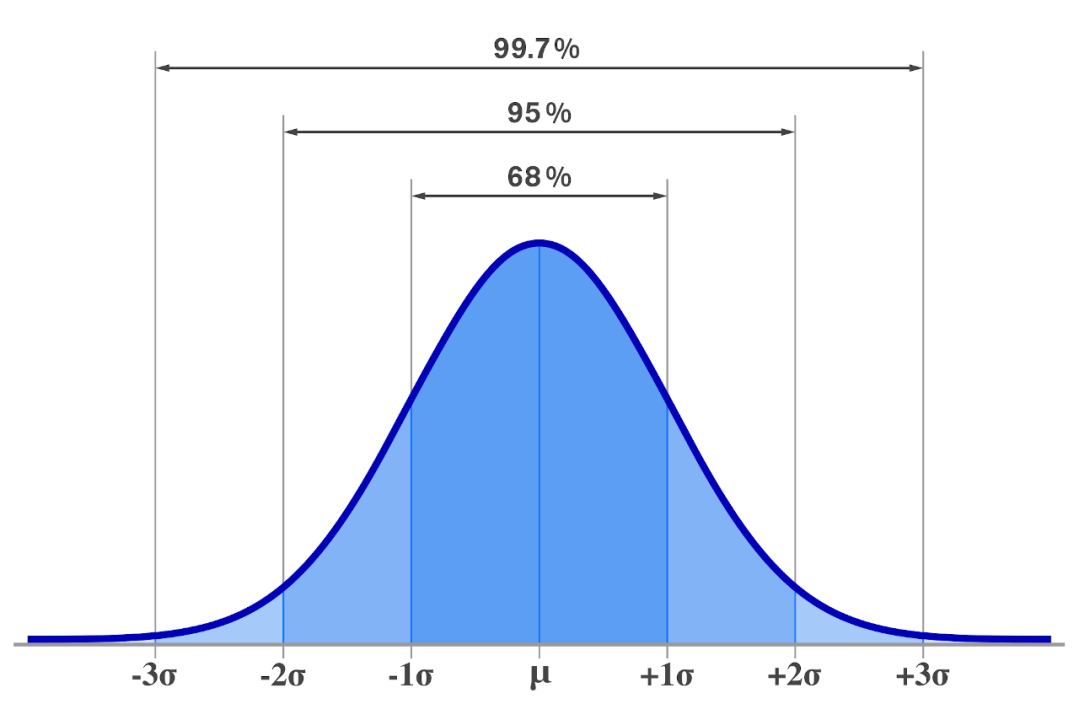

#### Faremos ent√£o o c√°lculo de novas colunas de **cadencia padronizada** a partir da m√©dia e desvio padr√£o **para cada Grupo e Turno**.

Veja, para o grupo "Dupla 1" e turno "A" temos:

```python
media=df[(df["Grupo"]=="Dupla 1")&(df["Turno"]=="A")]['Cadencia'].mean()
desvio_padrao=df[(df["Grupo"]=="Dupla 1")&(df["Turno"]=="A")]['Cadencia'].std()

df['Cadencia_Dupla1_A_p']=(df[(df["Grupo"]=="Dupla 1")&(df["Turno"]=="A")]['Cadencia']-media)/desvio_padrao
```
Podemos ainda usar loops for e iterar sobre os grupos e turnos, calculando e adicionando as novas colunas, veja:
 ```python

for turno in df.Turno.unique():
  for dupla in df.Grupo.unique():
    df_temp=df[(df["Grupo"]==dupla)&(df["Turno"]==turno)]['Cadencia']
    
    media=df_temp.mean()
    desvio_padrao=df_temp.std()

    dupla_sem_esp=dupla.replace(" ","") #removendo espa√ßos da string
    nome_coluna="Cadencia_"+dupla_sem_esp+"_"+turno+"_p"
    df[nome_coluna]=(df_temp-media)/desvio_padrao

 ```

In [ ]:
media=df[(df["Grupo"]=="Dupla 1")&(df["Turno"]=="A")]['Cadencia'].mean()
desvio_padrao=df[(df["Grupo"]=="Dupla 1")&(df["Turno"]=="A")]['Cadencia'].std()

df['Cadencia_Dupla1_A_p']=(df[(df["Grupo"]=="Dupla 1")&(df["Turno"]=="A")]['Cadencia']-media)/desvio_padrao

In [ ]:
for turno in df.Turno.unique():
  for dupla in df.Grupo.unique():
    df_temp=df[(df["Grupo"]==dupla)&(df["Turno"]==turno)]['Cadencia']

    media=df_temp.mean()
    desvio_padrao=df_temp.std()

    dupla_sem_esp=dupla.replace(" ","") #removendo espa√ßos da string
    nome_coluna="Cadencia_"+dupla_sem_esp+"_"+turno+"_p"
    df[nome_coluna]=(df_temp-media)/desvio_padrao

In [ ]:
df.head()

Turno  Moldes  Tempo Opera√ß√£o    Grupo  Falha Operacional  Cadencia  \
0     A      18               7  Dupla 1                  2  2.571429   
1     A      25               7  Dupla 1                  1  3.571429   
2     A      26               7  Dupla 1                  1  3.714286   
3     A      23               7  Dupla 1                  1  3.285714   
4     A      30               7  Dupla 1                  0  4.285714   

   Cadencia_Dupla1_A_p  Cadencia_Dupla2_A_p  Cadencia_Dupla3_A_p  \
0            -0.940176                  NaN                  NaN   
1            -0.359052                  NaN                  NaN   
2            -0.276034                  NaN                  NaN   
3            -0.525087                  NaN                  NaN   
4             0.056037                  NaN                  NaN   

   Cadencia_Dupla1_B_p  Cadencia_Dupla2_B_p  Cadencia_Dupla3_B_p  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   Cadencia_Dupla1_C_p  Cadencia_Dupla2_C_p  Cadencia_Dupla3_C_p  
0                  NaN                  NaN                  NaN  
1                  NaN                  NaN                  NaN  
2                  NaN                  NaN                  NaN  
3                  NaN                  NaN                  NaN  
4                  NaN                  NaN                  NaN

#### Iremos usar a biblioteca Scipy, especificamente o m√≥dulo ```stats``` relacionado a classes e m√©todos estat√≠sticos para lembrarmos conceitos importantes.

Faremos a importa√ß√£o:

```python
from scipy.stats import norm
```

Lembra das fun√ß√µes densidade de probabilidade e fun√ß√£o acumulativa desta fun√ß√£o (integral)? Pois √©, usaremos para identificar as probabilidades acumuladas associadas as cen√°rios de retirada de *outliers*.

Sabemos que na distribui√ß√£o Gaussiana de m√©dia 0 e desvio padr√£o 1 temos que entre -1,96 desvios e 1,96 possuimos probabilidade acumulada de 95% (Intervalo de Confian√ßa, Lembra?)

Para chegarmos a este resultado faremos a probabilidade acumulada at√© 1.96 **subtra√≠da** da probabilidade acumulada at√© 1.96:

```python
norm.cdf([1.96])-norm.cdf([-1.96])
```

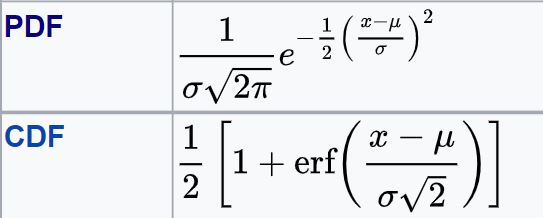

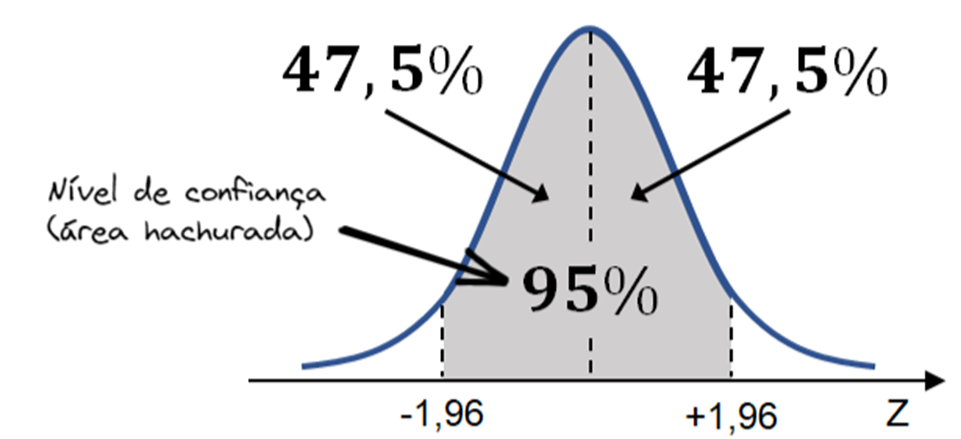

In [ ]:
from scipy.stats import norm

In [ ]:
norm.cdf([-1.96,1.96])

array([0.0249979, 0.9750021])

In [ ]:
norm.cdf([1.96])-norm.cdf([-1.96])

array([0.95000421])

#### Iremos plotar as distribui√ß√µes a partir de uma nova fun√ß√£o do ```seaborn``` chamada ```kdeplot```.

Um gr√°fico de estimativa de densidade de kernel (KDE) √© um m√©todo para visualizar o distribui√ß√£o das observa√ß√µes em um conjunto de dados, an√°logo a um histograma. KDE representa os dados usando uma curva de densidade de probabilidade cont√≠nua em um ou mais dimens√µes.

Link:[KDE](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot)

- 1¬∫ Criamos um Subplot de 3 Linhas e 3 Colunas.
- 2¬∫ Faremos uma itera√ß√£o ```for``` para as √∫ltimas nove colunas, representativas das combina√ß√µes de grupos com turnos. Precisamos criar contadores para mudan√ßa de linha e coluna.
-3¬∫ Ajustamos as plotagens √† figura com ```fig.tight_layout()```.


```python
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs=plt.subplots(3,3,figsize=(14,5))

cont_x=0
cont_y=0
for coluna_pad in colunas_padr:
  sns.kdeplot(df, x=coluna_pad,ax=axs[cont_x][cont_y])
  cont_y+=1
  if cont_y==3:
    cont_x+=1
    cont_y=0

fig.tight_layout()
```

In [ ]:
colunas_padr=df.columns[-9:]
colunas_padr

Index(['Cadencia_Dupla1_A_p', 'Cadencia_Dupla2_A_p', 'Cadencia_Dupla3_A_p',
       'Cadencia_Dupla1_B_p', 'Cadencia_Dupla2_B_p', 'Cadencia_Dupla3_B_p',
       'Cadencia_Dupla1_C_p', 'Cadencia_Dupla2_C_p', 'Cadencia_Dupla3_C_p'],
      dtype='object')

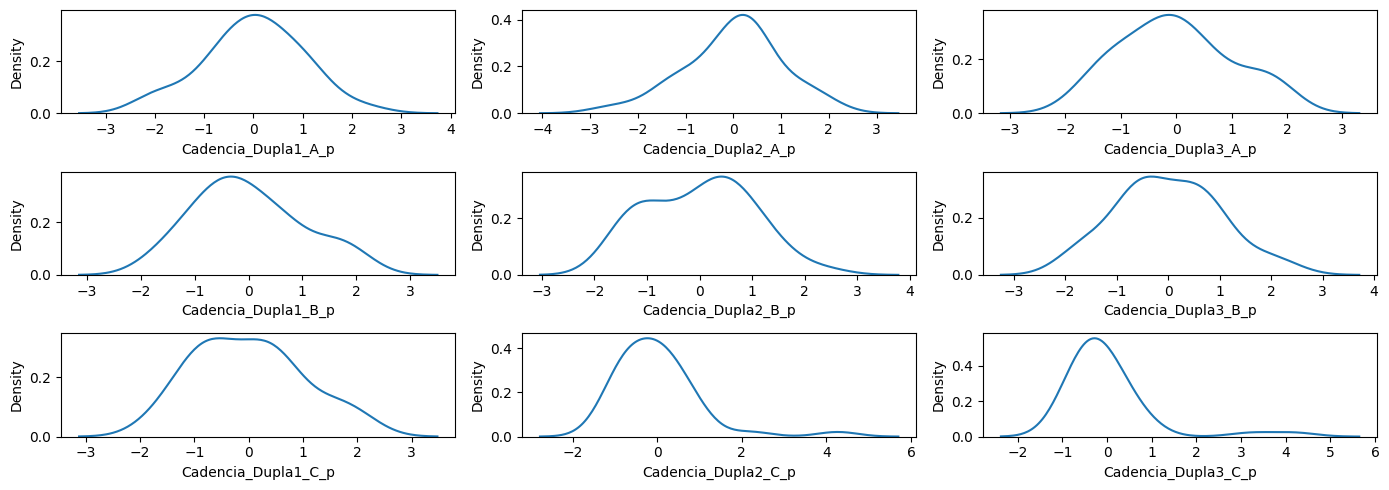

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs=plt.subplots(3,3,figsize=(14,5))

cont_x=0
cont_y=0
for coluna_pad in colunas_padr:
  sns.kdeplot(df, x=coluna_pad,ax=axs[cont_x][cont_y])
  cont_y+=1
  if cont_y==3:
    cont_x+=1
    cont_y=0

fig.tight_layout()

#### Para cada coluna criada faremos a filtragem do ```dataframe```. Usaremos intervalos baseados nos valores padronizados e vamos comparar com os antigos resultados baseados nos **boxplots** j√° criados.

Faremos para cada, definindo o limite inferior (li) e superior (ls) de Z:
```python
df[(df['Cadencia_DuplaX_Y_Padr']>ls) | (df['Cadencia_DuplaX_Y_Padr']<li)]
```
e fa√ßa o print do intervalo de confian√ßa associado:
```python
print(norm.cdf([ls])-norm.cdf([li]))
```
Podemos iterar sobre as √∫ltimas novas colunas como fizemos antes.

```python
for coluna_pad in colunas_padr:
  print(f"==============================={coluna_pad}===========================")
  print(df[(df[coluna_pad]>1.96) | (df[coluna_pad]<-1.96)][["Cadencia",coluna_pad]])
```

In [ ]:
for coluna_pad in colunas_padr:
  print(f"==============================={coluna_pad}===========================")
  print(df[(df[coluna_pad]>1.96) | (df[coluna_pad]<-1.96)][["Cadencia",coluna_pad]])

===============================Cadencia_Dupla1_A_p===========================
    Cadencia  Cadencia_Dupla1_A_p
19  0.571429            -2.102425
20  0.571429            -2.102425
35  8.142857             2.297517
===============================Cadencia_Dupla2_A_p===========================
      Cadencia  Cadencia_Dupla2_A_p
124   2.000000            -2.037680
132  13.000000             2.021863
135   0.428571            -2.617615
===============================Cadencia_Dupla3_A_p===========================
Empty DataFrame
Columns: [Cadencia, Cadencia_Dupla3_A_p]
Index: []
===============================Cadencia_Dupla1_B_p===========================
    Cadencia  Cadencia_Dupla1_B_p
46    11.375             2.074474
===============================Cadencia_Dupla2_B_p===========================
     Cadencia  Cadencia_Dupla2_B_p
171    11.625             2.347327
===============================Cadencia_Dupla3_B_p===========================
     Cadencia  Cadencia_Dupla3_B_p
305     7.87

#### A partir dos √≠ndices dos valores at√≠picos  (outliers) podemos para cada situa√ß√£o alterar o registros dos valores de cad√™ncia para nan (e filtrarmos excluindo os valores faltantes nan) ou exclu√≠-los de uma vez.

### ! Neste caso especificamente, vamos escluir os registros usando a fun√ß√£o ```DataFrame.drop```. Para isto, usaremos uma **lista** para **acumular** todos os **√≠ndices** a serem exclu√≠dos e deletaremos e de uma vez.

Faremos:
```python
lista_del_indices=[]
for coluna_pad in colunas_padr:
  idx=df[(df[coluna_pad]>1.96) | (df[coluna_pad]<-1.96)].index.values
  lista_del_indices+=[i for i in idx]

lista_del_indices
```
E excluiremos os itens usando:
```python
df.drop(lista_del_indices,inplace=True)
```

In [ ]:
lista_del_indices=[]
for coluna_pad in colunas_padr:
  idx=df[(df[coluna_pad]>1.96) | (df[coluna_pad]<-1.96)].index.values
  lista_del_indices+=[i for i in idx]

lista_del_indices

[19, 20, 35, 124, 132, 135, 46, 171, 305, 85, 115, 202, 219, 350, 354]

In [ ]:
df.drop(lista_del_indices,inplace=True)

###Normalidade e Sua Import√¢ncia para Testes Estat√≠sticos

####A normalidade √© um conceito fundamental em estat√≠stica que se refere √† conformidade dos dados com a distribui√ß√£o normal, tamb√©m conhecida como distribui√ß√£o Gaussiana. Essa distribui√ß√£o √© sim√©trica em torno da m√©dia, onde a maioria dos valores se concentra pr√≥ximo √† m√©dia e a probabilidade diminui √† medida que nos afastamos dela.

####Caracter√≠sticas da Distribui√ß√£o Normal:
- Simetria: A distribui√ß√£o √© perfeitamente sim√©trica em torno da m√©dia.

- M√©dia, Mediana e Moda Iguais: Em uma distribui√ß√£o normal, a m√©dia, a mediana e a moda s√£o iguais.

- Curva de Sinos: A forma gr√°fica da distribui√ß√£o normal √© a famosa curva em forma de sino.

- Probabilidade Espec√≠fica: Aproximadamente 68% dos valores est√£o dentro de um desvio padr√£o da m√©dia, 95% est√£o dentro de dois desvios padr√£o e 99.7% est√£o dentro de tr√™s desvios padr√£o.

####Import√¢ncia da Normalidade em Testes Estat√≠sticos:

- Base para Muitos Testes Estat√≠sticos: Muitos testes estat√≠sticos param√©tricos, como t-tests e ANOVAs, assumem que os dados seguem uma distribui√ß√£o normal. Isso ocorre porque essas t√©cnicas dependem de estimativas da m√©dia e da vari√¢ncia, que s√£o mais precisas quando os dados s√£o normalmente distribu√≠dos.

- Infer√™ncia e Intervalos de Confian√ßa: A normalidade permite o uso de intervalos de confian√ßa e testes de hip√≥teses mais robustos. Intervalos de confian√ßa constru√≠dos a partir de dados normais s√£o mais precisos e confi√°veis.

- Aplica√ß√£o de Teoremas Estat√≠sticos: Muitos teoremas fundamentais em estat√≠stica, como o Teorema Central do Limite, baseiam-se na normalidade. Este teorema afirma que, independentemente da distribui√ß√£o dos dados originais, a distribui√ß√£o da m√©dia amostral se aproxima de uma distribui√ß√£o normal conforme o tamanho da amostra aumenta.

- Facilidade de Interpreta√ß√£o: Dados que seguem uma distribui√ß√£o normal s√£o mais f√°ceis de interpretar e analisar. Muitos procedimentos estat√≠sticos t√™m resultados que s√£o mais facilmente compreendidos quando os dados s√£o normalmente distribu√≠dos.

###Testes de Normalidade

#### Nesta se√ß√£o, apresentamos um resumo dos testes de normalidade de D'Agostino and Pearson, Anderson-Darling, Shapiro-Wilk, destacando suas caracter√≠sticas e aplica√ß√µes.

#### Teste de D'Agostino and Pearson

O teste de D'Agostino and Pearson combina duas medidas de normalidade: a curtose e a assimetria dos dados.

- Curtose: Mede a "altura" e "largura" da distribui√ß√£o em rela√ß√£o √† distribui√ß√£o normal.

- Assimetria: Mede a simetria dos dados em torno da m√©dia.
- Procedimento: Calcula as estat√≠sticas de curtose e assimetria, e ent√£o combina essas estat√≠sticas em uma √∫nica medida de normalidade, gerando a estat√≠stica de teste K¬≤.

- Interpreta√ß√£o: Valores altos de K¬≤ indicam que os dados n√£o seguem uma distribui√ß√£o normal. Esse teste √© √∫til para detectar desvios da normalidade tanto na forma como na simetria da distribui√ß√£o.

####Teste de Anderson-Darling
O teste de Anderson-Darling √© uma modifica√ß√£o do teste de Kolmogorov-Smirnov que d√° mais peso √†s extremidades da distribui√ß√£o.

- Estat√≠stica A¬≤: A estat√≠stica de teste A¬≤ √© calculada com base na diferen√ßa entre a distribui√ß√£o emp√≠rica dos dados e a distribui√ß√£o normal te√≥rica, dando mais peso √†s caudas.

- Procedimento: Ordena os dados e calcula a estat√≠stica A¬≤, considerando a posi√ß√£o dos dados nas caudas da distribui√ß√£o.

- Interpreta√ß√£o: Valores maiores de A¬≤ indicam desvios mais acentuados da normalidade. Esse teste √© especialmente sens√≠vel a desvios nas extremidades da distribui√ß√£o, tornando-o adequado para detectar outliers ou desvios significativos nas caudas.

#### Teste de Shapiro-Wilk

O teste de Shapiro-Wilk √© amplamente utilizado por sua efic√°cia, especialmente para amostras pequenas a moderadas.

- Estat√≠stica W: Compara os dados observados com os valores esperados de uma distribui√ß√£o normal.

- Procedimento: Calcula a estat√≠stica W com base nas correla√ß√µes entre os dados observados e os valores normais esperados.

- Interpreta√ß√£o: Valores baixos de W indicam um desvio significativo da normalidade. Este teste √© particularmente eficaz para pequenas amostras, mas tamb√©m pode ser aplicado a amostras maiores.

####Compara√ß√£o e Aplica√ß√µes
D‚ÄôAgostino and Pearson: Melhor para detectar desvios tanto na forma quanto na simetria da distribui√ß√£o. √ötil para amostras de tamanho moderado a grande.

Anderson-Darling: Sens√≠vel a desvios nas extremidades da distribui√ß√£o. Adequado para detectar outliers e para aplica√ß√µes onde as caudas s√£o importantes.

Shapiro-Wilk: Eficaz para amostras pequenas a moderadas. Amplamente utilizado e confi√°vel para identificar desvios gerais da normalidade.

Para isto usaremos a biblioteca Scipy:

```python
from scipy.stats import normaltest, anderson, shapiro
```

A documenta√ß√£o est√° dispon√≠vel:
[D‚ÄôAgostino and Pearso](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#scipy.stats.normaltest)
[Anderson-Darling](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson)
[Shapiro-Wilk](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro)

‚ö°Lembrete
- Ho : Representa a Distribui√ß√£o Normal
- Ha : N√£o representa Distribui√ß√£o Normal
- p-valor:  probabilidade de se observar uma diferen√ßa t√£o grande ou maior do que a que foi observada sob a hip√≥tese nula


Criaremos uma fun√ß√£o que realize todos os testes estat√≠stcos:

```python
def testar_normal(dados):
  print(normaltest(dados))
  print(anderson(dados))
  print(shapiro(dados))
```

E faremos um loop sobre os dados, alterando o Grupo e Turno, obtendo dados filtrados e realizando os testes estat√≠sticos:

```python
for grupo_ in df['Grupo'].unique():
  for turno_ in df['Turno'].unique():
    print(f'Grupo: {grupo_}')
    print(f'Turno: {turno_}')
    testar_normal(df[(df['Grupo']==grupo_) & (df['Turno']==turno_)]['Cadencia'])
    print("\n")
```

In [ ]:
from scipy.stats import normaltest, anderson, shapiro

In [ ]:
def testar_normal(dados):
  print(normaltest(dados))
  print(anderson(dados))
  print(shapiro(dados))


In [ ]:
for grupo_ in df['Grupo'].unique():
  for turno_ in df['Turno'].unique():
    print(f'Grupo: {grupo_}')
    print(f'Turno: {turno_}')
    testar_normal(df[(df['Grupo']==grupo_) & (df['Turno']==turno_)]['Cadencia'])
    print("\n")

Grupo: Dupla 1
Turno: A
NormaltestResult(statistic=0.29858385014355965, pvalue=0.8613176379812426)
AndersonResult(statistic=0.15276305046755567, critical_values=array([0.529, 0.602, 0.722, 0.842, 1.002]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=4.277992277992278, scale=1.4277560950872863)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
ShapiroResult(statistic=0.9880954040336964, pvalue=0.9558187343081964)


Grupo: Dupla 1
Turno: B
NormaltestResult(statistic=1.3460717392811632, pvalue=0.5101574529481469)
AndersonResult(statistic=0.5289262428588515, critical_values=array([0.53 , 0.604, 0.725, 0.845, 1.005]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=5.967948717948718, scale=2.424470565632162)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
ShapiroResult(statistic=0.954693936115658, pvalue=0.11831403629599307)



#### Para realizar um teste t precisamos considerar:

- Independ√™ncia: As observa√ß√µes de um grupo s√£o independentes das observa√ß√µes de outro grupo.

- Normalidade: Os dados de cada grupo seguem uma distribui√ß√£o aproximadamente normal. (Acabamos de realizar os teste)

- Homogeneidade de vari√¢ncias: As vari√¢ncias dos dois grupos s√£o aproximadamente iguais.

Podemos verificar as m√©dias e vari√¢ncias:

```python
for turno_ in df['Turno'].unique():
  for grupo_ in df['Grupo'].unique():
    print(f"Grupo:{grupo_} ",end=" ")
    print(f"Turno:{turno_} ",end=" ")
    part=df[(df['Grupo']==grupo_) & (df['Turno']==turno_)]['Cadencia']
    print("Mean:{0:1.2f}  Variance:{1:1.3f}".format(part.mean(),part.std()) ,end="")
    print("\n")
```

Para as colunas de valores padronizados:

```python
for coluna_pad in colunas_padr:
  part_=df[coluna_pad].dropna()
  print(coluna_pad,end="  ")
  print("Mean:{0:1.2f}  Variance:{1:1.3f}".format(part_.mean(),part_.std()) )
```

In [ ]:
for turno_ in df['Turno'].unique():
  for grupo_ in df['Grupo'].unique():
    print(f"Grupo:{grupo_} ",end=" ")
    print(f"Turno:{turno_} ",end=" ")
    part=df[(df['Grupo']==grupo_) & (df['Turno']==turno_)]['Cadencia']
    print("Mean:{0:1.2f}  Variance:{1:1.3f}".format(part.mean(),part.std()) ,end="")
    print("\n")

Grupo:Dupla 1  Turno:A  Mean:4.28  Variance:1.428

Grupo:Dupla 2  Turno:A  Mean:7.71  Variance:2.200

Grupo:Dupla 3  Turno:A  Mean:6.85  Variance:1.150

Grupo:Dupla 1  Turno:B  Mean:5.97  Variance:2.424

Grupo:Dupla 2  Turno:B  Mean:8.42  Variance:1.246

Grupo:Dupla 3  Turno:B  Mean:6.38  Variance:0.604

Grupo:Dupla 1  Turno:C  Mean:3.45  Variance:0.545

Grupo:Dupla 2  Turno:C  Mean:3.88  Variance:1.156

Grupo:Dupla 3  Turno:C  Mean:3.32  Variance:0.868



In [ ]:
for coluna_pad in colunas_padr:
  part_=df[coluna_pad].dropna()
  print(coluna_pad,end="  ")
  print("Mean:{0:1.2f}  Variance:{1:1.3f}".format(part_.mean(),part_.std()) )

Cadencia_Dupla1_A_p  Mean:0.05  Variance:0.830
Cadencia_Dupla2_A_p  Mean:0.07  Variance:0.812
Cadencia_Dupla3_A_p  Mean:0.00  Variance:1.000
Cadencia_Dupla1_B_p  Mean:-0.05  Variance:0.954
Cadencia_Dupla2_B_p  Mean:-0.06  Variance:0.937
Cadencia_Dupla3_B_p  Mean:-0.06  Variance:0.941
Cadencia_Dupla1_C_p  Mean:-0.11  Variance:0.904
Cadencia_Dupla2_C_p  Mean:-0.17  Variance:0.632
Cadencia_Dupla3_C_p  Mean:-0.20  Variance:0.482


###Realizando a compara√ß√£o entre as m√©dias usando Teste T.

####Teste estat√≠sticos s√£o importantes para tomada de decis√µes. Comparando a m√©dia dos valores dos grupos para cada turno, podemos inferir que alguns grupos possuem produtividade similar ou diferente e assim podemos ajustar nossa capacidade e m√£o de obra e descobrir qual a combina√ß√£o entre grupos e turnos que efetivamente √© melhor.

#### Usaremos o Teste T, em especial o **Welch‚Äôs t-test** para comparar nosso grupos para turnos similares.

Para importar o teste fazemos:

```python
from scipy.stats import ttest_ind
```

Faremos ent√£o compara√ß√£o em pares, isto √©, para cada turno especificamente, faremos que os grupos sejam comparados, para isso, criaremos uma estrutura loop ```for``` mais complexa, seguinte:

```python
resultados_ttest=pd.DataFrame()


for turno_ in df['Turno'].unique():
  for grupo_1 in df['Grupo'].unique():
    for grupo_2 in df['Grupo'].unique():
      if grupo_1==grupo_2:
        continue
      else:
        
        descricao1=str(grupo_1)+" "+ str(turno_)
        descricao2=str(grupo_2)+" "+ str(turno_)
        
        print(f"Grupo 1: {descricao1}")
        print(f"Grupo 2: {descricao2}")
        temp1=df[(df['Grupo']==grupo_1) & (df['Turno']==turno_)]['Cadencia'].values
        temp2=df[(df['Grupo']==grupo_2) & (df['Turno']==turno_)]['Cadencia'].values

        res=ttest_ind(temp1, temp2,equal_var=False)
        print(res)
        if res.pvalue>=0.05:
          print("Ho aceita: m√©dia iguais estat√≠sticamente para 95% de confian√ßa")
        else:
          print("Ho rejeitada, aceita Ha: m√©dia diferentes estat√≠sticamente para 95% de confian√ßa")
        
        print("\n")
```


In [ ]:
from scipy.stats import ttest_ind

In [ ]:
resultados_ttest=pd.DataFrame()


for turno_ in df['Turno'].unique():
  for grupo_1 in df['Grupo'].unique():
    for grupo_2 in df['Grupo'].unique():
      if grupo_1==grupo_2:
        continue
      else:

        descricao1=str(grupo_1)+" "+ str(turno_)
        descricao2=str(grupo_2)+" "+ str(turno_)

        print(f"Grupo 1: {descricao1}")
        print(f"Grupo 2: {descricao2}")
        temp1=df[(df['Grupo']==grupo_1) & (df['Turno']==turno_)]['Cadencia'].values
        temp2=df[(df['Grupo']==grupo_2) & (df['Turno']==turno_)]['Cadencia'].values

        res=ttest_ind(temp1, temp2,equal_var=False)
        print(res)
        if res.pvalue>=0.05:
          print("Ho aceita: m√©dia iguais estat√≠sticamente para 95% de confian√ßa")
        else:
          print("Ho rejeitada, aceita Ha: m√©dia diferentes estat√≠sticamente para 95% de confian√ßa")

        print("\n")

Grupo 1: Dupla 1 A
Grupo 2: Dupla 2 A
TtestResult(statistic=-7.9709838624545934, pvalue=4.554081349282318e-11, df=61.76374799948753)
Ho rejeitada, aceita Ha: m√©dia diferentes estat√≠sticamente para 95% de confian√ßa


Grupo 1: Dupla 1 A
Grupo 2: Dupla 3 A
TtestResult(statistic=-8.649547590781987, pvalue=1.2720355923571845e-12, df=69.18648440028659)
Ho rejeitada, aceita Ha: m√©dia diferentes estat√≠sticamente para 95% de confian√ßa


Grupo 1: Dupla 2 A
Grupo 2: Dupla 1 A
TtestResult(statistic=7.9709838624545934, pvalue=4.554081349282318e-11, df=61.76374799948753)
Ho rejeitada, aceita Ha: m√©dia diferentes estat√≠sticamente para 95% de confian√ßa


Grupo 1: Dupla 2 A
Grupo 2: Dupla 3 A
TtestResult(statistic=2.144099118848868, pvalue=0.03659833537868241, df=53.36771382985038)
Ho rejeitada, aceita Ha: m√©dia diferentes estat√≠sticamente para 95% de confian√ßa


Grupo 1: Dupla 3 A
Grupo 2: Dupla 1 A
TtestResult(statistic=8.649547590781987, pvalue=1.2720355923571845e-12, df=69.1864844002865

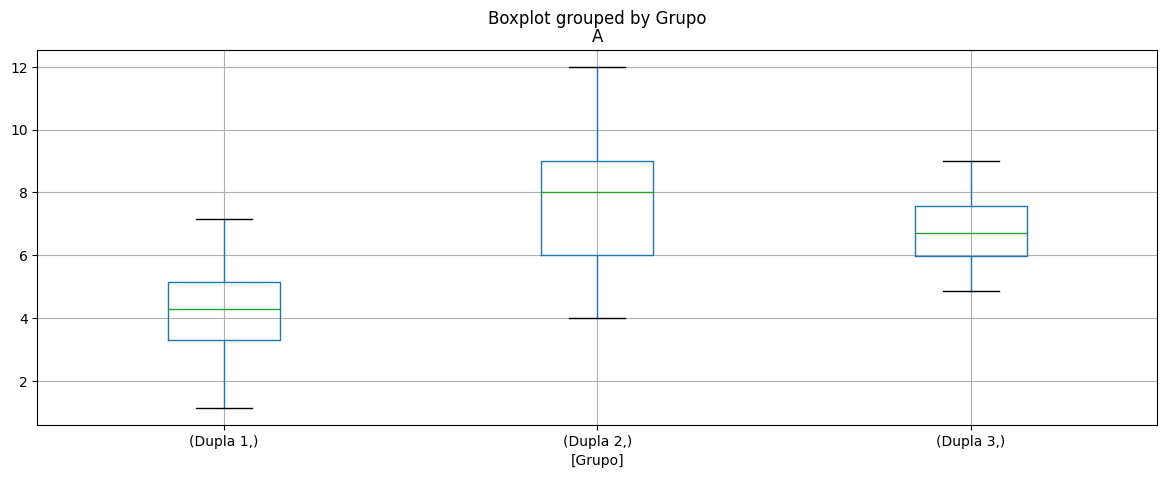

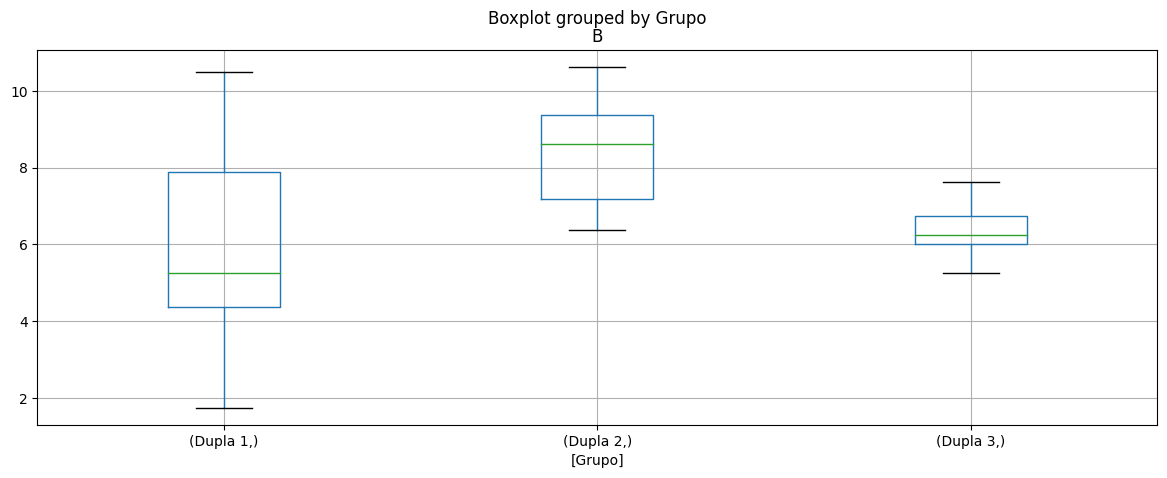

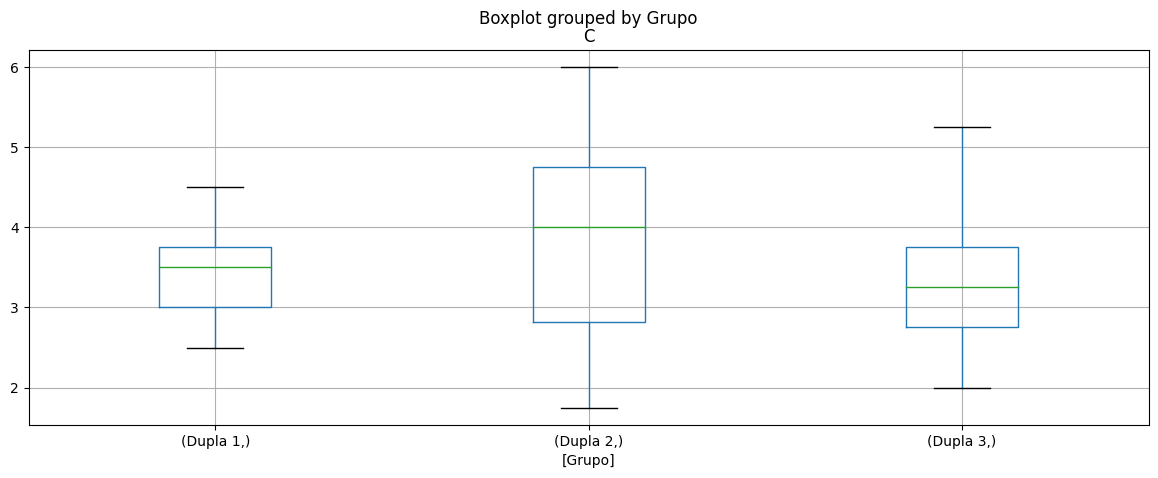

In [ ]:
for turno_ in df['Turno'].unique():
  df[df['Turno']==turno_].boxplot(by=['Grupo',],column='Cadencia',figsize=(14,5))
  plt.title(turno_)

###B√îNUS DE ESTAT√çSTICA ---- EST 220!

#### ANOVA E TESTE TUKEY, BELOS MOTIVOS PARA USAR!

### Quando realizamos v√°rios testes t entre grupos:

- Problema: Realizar v√°rios testes t aumenta a probabilidade de cometer um erro do tipo I (falso positivo) porque cada teste adicional aumenta a chance de encontrar uma diferen√ßa significativa por acaso. Isso √© conhecido como problema de compara√ß√µes m√∫ltiplas.

#### Falso positivo: rejeitar a hip√≥tese nula quando ela √© verdadeira e absoluta, isto √©, quando n√£o h√° diferen√ßa estat√≠stica entre as m√©dias, mas dizemos que sim! Seria o mesmo que dizer que um turno √© melhor ou pior que o outro sendo que **N√ÉO** √©!

#### Para fugir disso, usaremos
#### Teste de Tukey (HSD - Honest Significant Difference):

- Quando usar: O teste de Tukey √© mais apropriado quando voc√™ j√° realizou uma ANOVA e encontrou uma diferen√ßa significativa. Ele √© projetado para comparar todas as poss√≠veis combina√ß√µes de grupos ao mesmo tempo, controlando a taxa de erro do tipo I ao n√≠vel desejado.

- Vantagens: O teste de Tukey √© mais conservador e reduz a probabilidade de cometer um erro do tipo I em compara√ß√£o com m√∫ltiplos testes t. Ele tamb√©m √© f√°cil de interpretar, pois fornece compara√ß√µes par a par com um √∫nico crit√©rio de signific√¢ncia.

**Relembrando conceitos**:
Se o valor p for menor que 0.05 (f grande), voc√™ pode rejeitar a hip√≥tese nula de que as m√©dias dos grupos s√£o iguais, o que indica que h√° uma diferen√ßa significativa entre pelo menos dois dos grupos.



#### PARA ISSO VAMOS FAZER A AN√ÅLISE DE VARI√ÇNCIA PRIMEIRO PARA CADA TURNO:
```python
import statsmodels.api as sm
from statsmodels.formula.api import ols
for turno in df.Turno.unique():
  print("\n")
  print(f"Turno {turno} analisado")
  # Definindo o modelo
  modelo = ols('Cadencia ~ C(Grupo)', data=df[df['Turno']==turno]).fit()

  # Realizando a ANOVA
  anova_result = sm.stats.anova_lm(modelo, typ=2)
  print(anova_result)
```


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
for turno in df.Turno.unique():
  print("\n")
  print(f"Turno {turno} analisado")
  # Definindo o modelo
  modelo = ols('Cadencia ~ C(Grupo)', data=df[df['Turno']==turno]).fit()

  # Realizando a ANOVA
  anova_result = sm.stats.anova_lm(modelo, typ=2)
  print(anova_result)



Turno A analisado
              sum_sq     df          F        PR(>F)
C(Grupo)  237.222516    2.0  44.009911  8.446537e-15
Residual  299.156467  111.0        NaN           NaN


Turno B analisado
              sum_sq     df          F        PR(>F)
C(Grupo)  135.043536    2.0  25.984888  5.034116e-10
Residual  296.229167  114.0        NaN           NaN


Turno C analisado
             sum_sq     df         F    PR(>F)
C(Grupo)   6.409693    2.0  4.026321  0.020532
Residual  87.557121  110.0       NaN       NaN


#### O SEGUNDO PASSO √â REALIZAR O TESTE TUKEY E PLOTAR OS RESULTADOS
#### Lembrando:
#### - Ho: n√£o h√° diferen√ßa estat√≠stica
#### - Ha: existe diferen√ßa estat√≠stica

```python
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

for turno in df.Turno.unique():
  print("\n")
  print(f"Teste Tukey para turno {turno}")
  tukey = pairwise_tukeyhsd(endog=df[df['Turno']==turno]['Cadencia'],groups=df[df['Turno']==turno]['Grupo'], alpha=0.05)
  print(tukey)
  tukey.plot_simultaneous()
  plt.title('Compara√ß√µes m√∫ltiplas - Teste de Tukey')
  plt.show()
```



Teste Tukey para turno A
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
Dupla 1 Dupla 2   3.4363    0.0  2.5296  4.343   True
Dupla 1 Dupla 3   2.5684    0.0  1.6789  3.458   True
Dupla 2 Dupla 3  -0.8679 0.0575 -1.7574 0.0217  False
-----------------------------------------------------


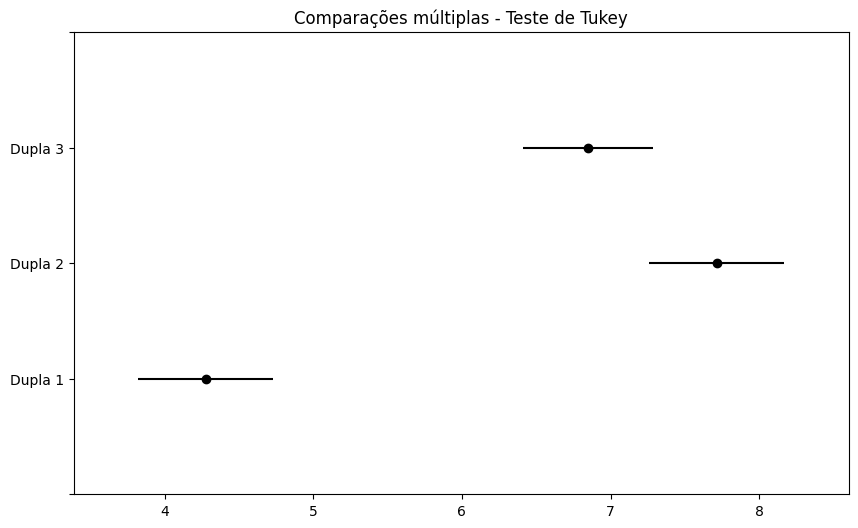



Teste Tukey para turno B
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Dupla 1 Dupla 2   2.4551    0.0  1.5883   3.322   True
Dupla 1 Dupla 3   0.4071 0.5068 -0.4598  1.2739  False
Dupla 2 Dupla 3  -2.0481    0.0  -2.915 -1.1812   True
------------------------------------------------------


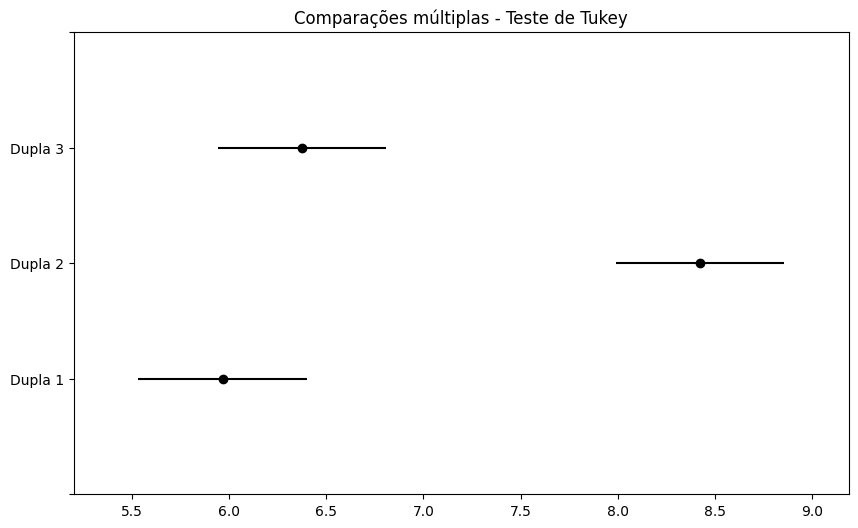



Teste Tukey para turno C
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Dupla 1 Dupla 2   0.4276 0.0967 -0.0587  0.9139  False
Dupla 1 Dupla 3  -0.1296 0.8045 -0.6192  0.3599  False
Dupla 2 Dupla 3  -0.5573 0.0215 -1.0468 -0.0677   True
------------------------------------------------------


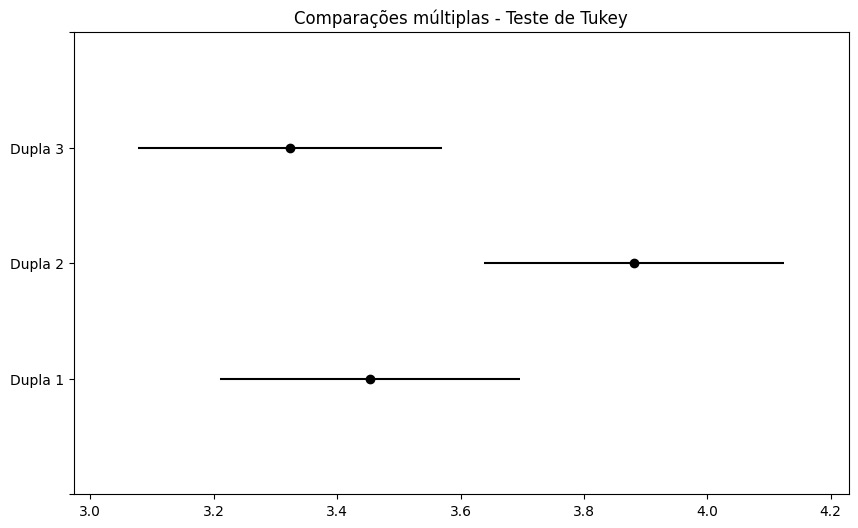

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

for turno in df.Turno.unique():
  print("\n")
  print(f"Teste Tukey para turno {turno}")
  tukey = pairwise_tukeyhsd(endog=df[df['Turno']==turno]['Cadencia'],groups=df[df['Turno']==turno]['Grupo'], alpha=0.05)
  print(tukey)
  tukey.plot_simultaneous()
  plt.title('Compara√ß√µes m√∫ltiplas - Teste de Tukey')
  plt.show()

#Simula√ß√£o de Monte Carlo

### Como funciona?

A simula√ß√£o de Monte Carlo √© uma t√©cnica estat√≠stica que utiliza a gera√ß√£o de n√∫meros aleat√≥rios para modelar e analisar sistemas complexos e processos incertos. √â amplamente utilizada em diversas √°reas, como finan√ßas, f√≠sica, engenharia e outras ci√™ncias, para estimar a probabilidade de diferentes resultados em um processo que n√£o pode ser facilmente determinado de forma anal√≠tica.

### Onde aplicaremos?

Lembra do termo estoc√°stico? Sim! Podem ser explicados por distruibui√ß√µes de probabilidade, que possuem vari√°veis aleat√≥rias...

### Aplicaremos no resultado financeiro de uma empresa!

Simular os lucros de uma empresa usando a t√©cnica de Monte Carlo √© uma aplica√ß√£o pr√°tica e interessante. Vamos fazer uma simula√ß√£o onde estimaremos os lucros de uma empresa levando em considera√ß√£o a incerteza em suas receitas e custos.

Para isso faremos, precisamos:

- Obter dados de receitas e custos.
- Descobrir, estes dados seguem qual distribui√ß√£o?
- Preparar a Modelagem.
- Realizar Simula√ß√£o.
- Analisar Resultados.



###Obtendo dados do arquivo .csv

```python
df_emp=pd.read_csv("/content/drive/MyDrive/Python para ProducÃßaÃÉo/empresa_res.csv",sep=';')
```

In [ ]:
df_emp=pd.read_csv("/content/drive/MyDrive/Python para ProducÃßaÃÉo/empresa_res.csv",sep=';')

### Explorando nossos dados

Use:

```python
df_emp.info()
```

In [ ]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Data           471 non-null    object 
 1   Receita (mil)  471 non-null    float64
 2   CMV (mil)      471 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.2+ KB


### Ajuste a coluna de Data

Use:

```python
df_emp['Data']=pd.to_datetime(df_emp['Data'].values,format='%d/%m/%Y')
```

In [ ]:
df_emp['Data']=pd.to_datetime(df_emp['Data'].values,format='%d/%m/%Y')

### Explorando nossos dados, ver os 5 primeiros valores

Use:

```python
df_emp.head()
```

In [ ]:
df_emp.head()

Data  Receita (mil)  CMV (mil)
0 2020-01-01          51.18      15.55
1 2020-01-02          58.19      17.68
2 2020-01-03          41.99      12.60
3 2020-01-04          59.63      18.46
4 2020-01-05         116.05      34.99

### Realize a plotagem das s√©ries hist√≥ricas para as duas colunas de valores

Use:

```python
df_emp.plot.line(x='Data',y='Receita (mil)',figsize=(20,5))
```

<Axes: xlabel='Data'>

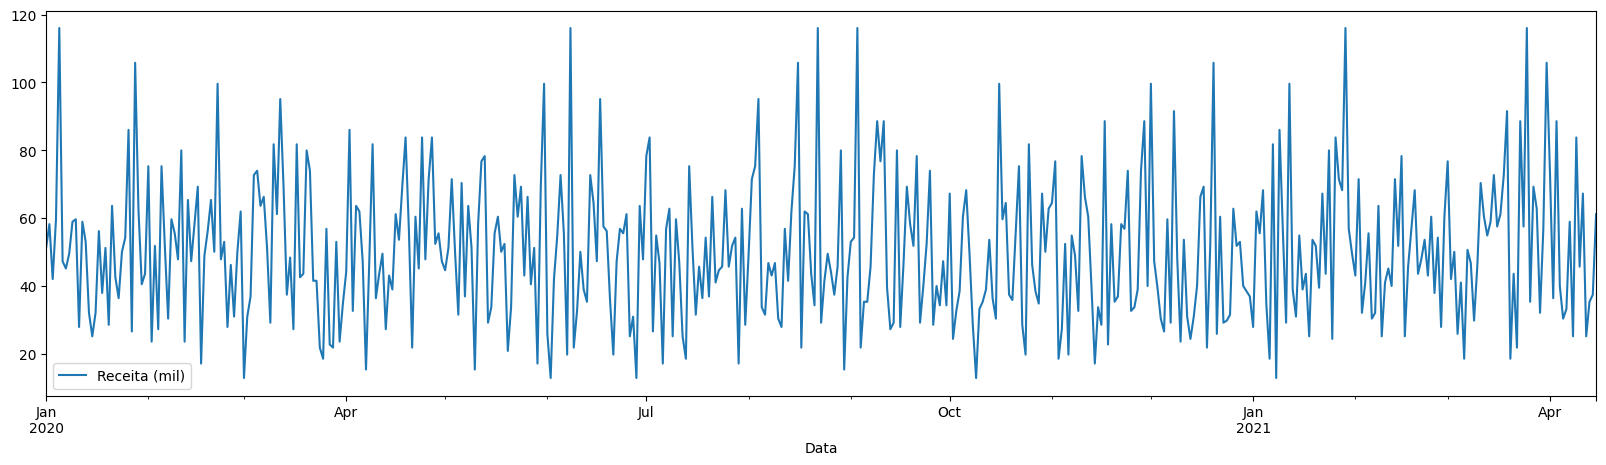

In [ ]:
df_emp.plot.line(x='Data',y='Receita (mil)',figsize=(20,5))

<Axes: xlabel='Data'>

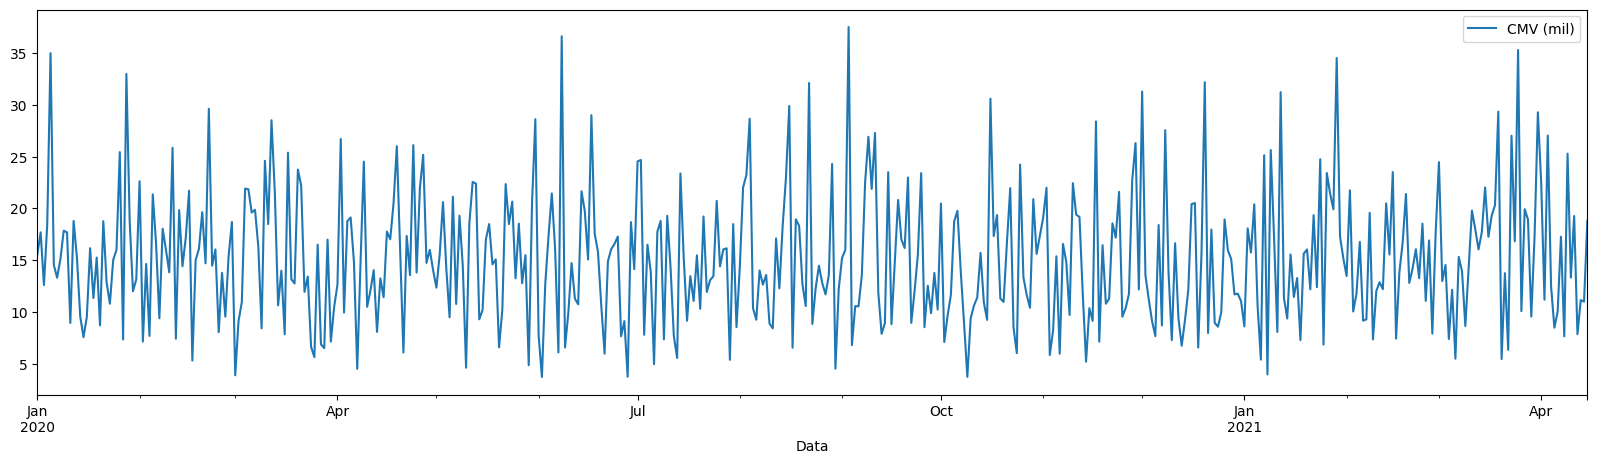

In [ ]:
df_emp.plot.line(x='Data',y='CMV (mil)',figsize=(20,5))

<Axes: xlabel='Data'>

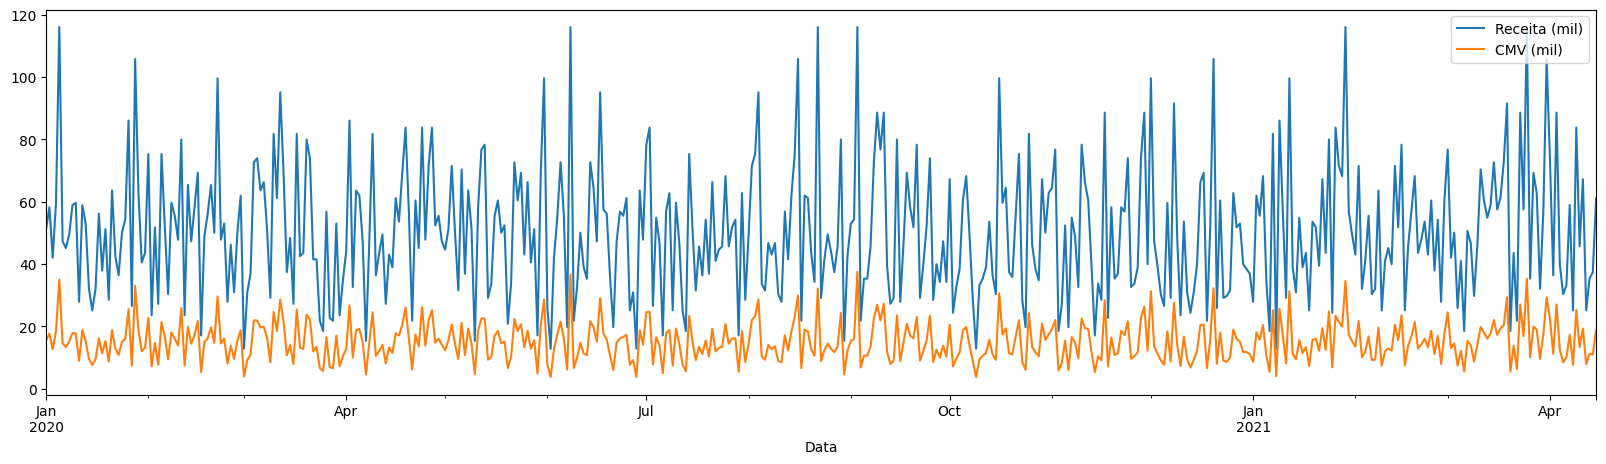

In [ ]:
df_emp.plot.line(x='Data',y=['Receita (mil)','CMV (mil)'],figsize=(20,5))

### Precisaremos agora de uma Library/Biblioteca para adequar o nosso conjunto de dados (ou recorte) a uma distribui√ß√£o de probabilidade espec√≠fica. Vamos descobrir qual ser√° ?!

Instalamos a library ```fitter```
```python
!pip install fitter
```
E usaremos
```python
from fitter import Fitter, get_common_distributions
```
- Com Fitter buscaremos o melhor ajuste a uma distribui√ß√£o.
- Com get_common_distributions usaremos algumas distribui√ß√µes como par√¢metro para teste de ajuste!

Existem v√°rias maneiras de buscar um melhor ajuste (Goodness of Fit),
um exemplo no excel:

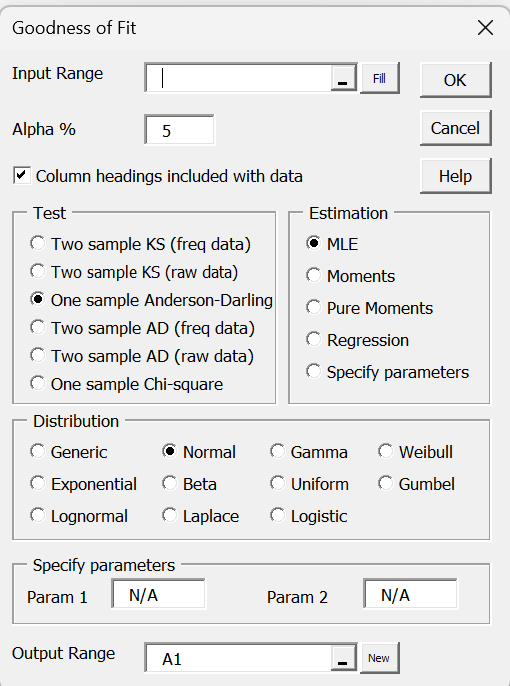

In [ ]:
!pip install fitter

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.5/62.5 kB 3.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.3/8.3 MB 50.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


sumsquare_error          aic          bic  kl_div  ks_statistic  \
rayleigh         0.002948  1012.027625  1020.337341     inf      0.023321   
gamma            0.003027  1016.354169  1028.818743     inf      0.034215   
chi2             0.003027  1016.354196  1028.818770     inf      0.034215   
lognorm          0.003053  1019.531827  1031.996401     inf      0.032935   
exponpow         0.003215  1005.675314  1018.139889     inf      0.053462   

          ks_pvalue  
rayleigh   0.954622  
gamma      0.627043  
chi2       0.627039  
lognorm    0.673870  
exponpow   0.130596

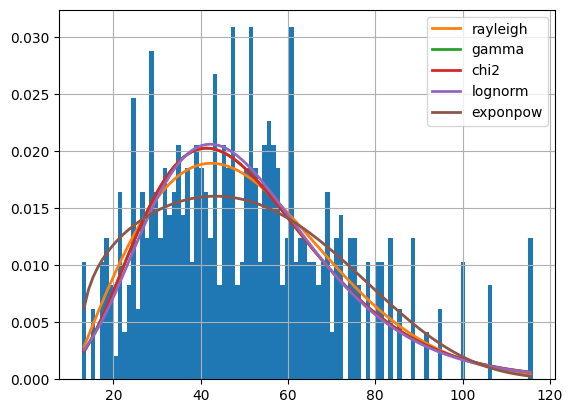

In [ ]:
from fitter import Fitter, get_common_distributions
import numpy as np

# Dados simulados
data = np.random.normal(0, 1, 1000)

# Ajustando e comparando v√°rias distribui√ß√µes
f = Fitter(df_emp["Receita (mil)"], distributions=get_common_distributions())
f.fit()

# Exibindo as melhores distribui√ß√µes
f.summary()

In [ ]:
f.get_best()

{'rayleigh': {'loc': 10.365804054968944, 'scale': 32.04837191296966}}

In [ ]:
from scipy.stats import rayleigh

In [ ]:
receita_mil=rayleigh.rvs(loc=10.3658,scale=32.0483,size=10000)
print(receita_mil.shape)

(10000,)


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


sumsquare_error         aic         bic  kl_div  ks_statistic  \
rayleigh         0.017767  820.216656  828.526372     inf      0.020555   
gamma            0.018349  817.365964  829.830538     inf      0.026223   
chi2             0.018349  817.365739  829.830314     inf      0.026223   
lognorm          0.018603  820.182895  832.647470     inf      0.029236   
norm             0.021067  866.298778  874.608494     inf      0.053336   

          ks_pvalue  
rayleigh   0.986295  
gamma      0.893723  
chi2       0.893723  
lognorm    0.804345  
norm       0.132271

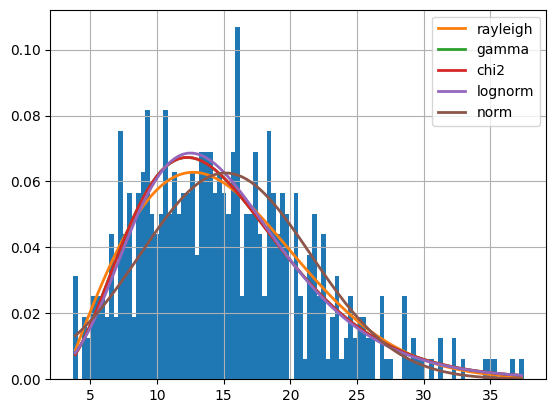

In [ ]:
f2 = Fitter(df_emp["CMV (mil)"], distributions=get_common_distributions())
f2.fit()
f2.summary()

In [ ]:
f2.get_best()

{'rayleigh': {'loc': 3.0544524927953747, 'scale': 9.65841560970017}}

In [ ]:
CMV_mil=rayleigh.rvs(loc=3.0544,scale=9.6584,size=10000)
print(CMV_mil.shape)

(10000,)


In [ ]:
receita_mil.sort()

In [ ]:
CMV_mil.sort()

In [ ]:
Lucro=receita_mil-CMV_mil

In [ ]:
import seaborn as sns

<Axes: ylabel='Density'>

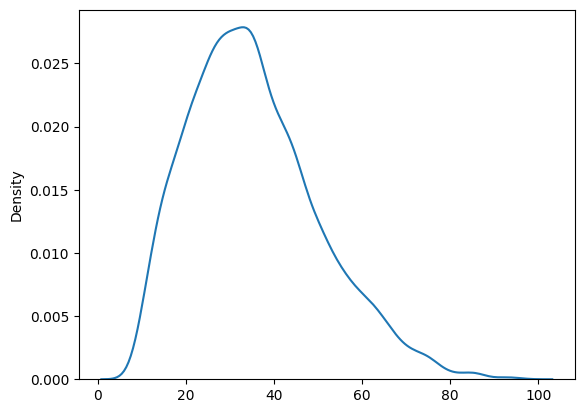

In [ ]:
sns.kdeplot(Lucro)

- Qual a probabilidade de se obter um Lucro maior que 50 mil?
- Qual a probabilidade de se obter um Lucro extraordin√°rio superior a 80 mil?
- Qual a probabilidade de se obter um valor p√©ssimo de Lucro, inferior a 10 mil?
- Qual o intervalo de confian√ßa associado a aproximados 80%?
Aqui √© poss√≠vel:

- 1: Ajustar o novo resultado a uma distribui√ß√£o e obter as respostas
- 2: Contabilizar a frequ√™ncia calculando diretamente

In [ ]:
prob_maior_50=(Lucro[Lucro>=50].shape[0]/10000)*100
print(f"P (X>=50): {np.round(prob_maior_50,2)}%")

P (X>=50): 16.14%


In [ ]:
prob_maior_80=(Lucro[Lucro>80].shape[0]/10000)*100
print(f"P (X>80): {np.round(prob_maior_80,2)}%")

P (X>80): 0.53%


In [ ]:
prob_menor_10=(Lucro[Lucro<10].shape[0]/10000)*100
print(f"P (X<10): {np.round(prob_menor_10,2)}%")

P (X<10): 0.56%


In [ ]:
prob_menor_10=(Lucro[(Lucro>17) & ((Lucro<55))].shape[0]/10000)*100
print(f"P (X<10): {np.round(prob_menor_10,2)}%")

P (X<10): 79.71%
